In [65]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [24]:
df_bowling = pd.read_csv('Test Player Innings Stats - All Teams.csv')

In [26]:
df_bowling.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,L Hutton,364,364,797,1.0,0.0,847,35,0,42.97,1,v Australia,The Oval,1938/08/20,England,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WR Hammond,336*,336,318,1.0,1.0,-,34,10,-,2,v New Zealand,Auckland,1933/03/31,England,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GA Gooch,333,333,628,1.0,0.0,485,43,3,68.65,1,v India,Lord's,1990/07/26,England,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A Sandham,325,325,600,1.0,0.0,640,28,0,50.78,1,v West Indies,Kingston,1930/04/03,England,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JH Edrich,310*,310,532,1.0,1.0,450,52,5,68.88,1,v New Zealand,Leeds,1965/07/08,England,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_bowling = df_bowling[['Innings Player','Innings Overs Bowled','Innings Bowled Flag','Innings Maidens Bowled','Innings Runs Conceded','Innings Wickets Taken','4 Wickets','5 Wickets', 'Innings Economy Rate','Country']]

In [29]:
df_bowling=df_bowling.dropna()

In [31]:
df_bowling = df_bowling[~df_bowling['Innings Overs Bowled'].isin(['-'])]
df_bowling = df_bowling[~df_bowling['Innings Bowled Flag'].isin(['-'])]
df_bowling = df_bowling[~df_bowling['Innings Maidens Bowled'].isin(['-'])]
df_bowling = df_bowling[~df_bowling['Innings Runs Conceded'].isin(['-'])]
df_bowling = df_bowling[~df_bowling['Innings Wickets Taken'].isin(['-'])]
df_bowling = df_bowling[~df_bowling['4 Wickets'].isin(['-'])]
df_bowling = df_bowling[~df_bowling['5 Wickets'].isin(['-'])]
df_bowling = df_bowling[~df_bowling['Innings Economy Rate'].isin(['-'])]

In [32]:
df_bowling['Innings Overs Bowled'] = df_bowling['Innings Overs Bowled'].astype(float)
df_bowling['Innings Bowled Flag'] = df_bowling['Innings Bowled Flag'].astype(int)
df_bowling['Innings Maidens Bowled'] = df_bowling['Innings Maidens Bowled'].astype(int)
df_bowling['Innings Runs Conceded'] = df_bowling['Innings Runs Conceded'].astype(int)
df_bowling['Innings Wickets Taken'] = df_bowling['Innings Wickets Taken'].astype(int)
df_bowling['4 Wickets'] = df_bowling['4 Wickets'].astype(int)
df_bowling['5 Wickets'] = df_bowling['5 Wickets'].astype(int)
df_bowling['Innings Economy Rate'] = df_bowling['Innings Economy Rate'].astype(float)

In [170]:
df_bowling.head()

,Innings Player,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,Innings Economy Rate,Country
94439,JC Laker,51.2,1,23,53,10,0,0,1.03,England
94440,GA Lohmann,14.2,1,6,28,9,0,1,2.33,England
94441,JC Laker,16.4,1,4,37,9,0,1,2.22,England
94442,DE Malcolm,16.3,1,2,57,9,0,1,3.45,England
94443,SF Barnes,38.4,1,7,103,9,0,1,2.66,England


In [36]:
req_df = df_bowling[(df_bowling.Country=='Australia')]

In [174]:
req_df.head()

,Innings Player,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,Innings Economy Rate,Country
115009,AA Mailey,47.0,1,8,121,9,0,1,2.57,Australia
115010,GD McGrath,16.0,1,8,24,8,0,1,1.50,Australia
115011,FJ Laver,18.2,1,7,31,8,0,1,1.69,Australia
115012,GD McGrath,20.3,1,8,38,8,0,1,1.85,Australia
115013,AE Trott,27.0,1,10,43,8,0,1,1.59,Australia


In [160]:
req_df['5 Wickets'].value_counts()

0    7504
1    620 
Name: 5 Wickets, dtype: int64

In [162]:
DF = req_df[req_df['5 Wickets']!=0]

In [172]:
DF.head()

,Innings Player,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,Innings Economy Rate,Country
115009,AA Mailey,47.0,1,8,121,9,0,1,2.57,Australia
115010,GD McGrath,16.0,1,8,24,8,0,1,1.50,Australia
115011,FJ Laver,18.2,1,7,31,8,0,1,1.69,Australia
115012,GD McGrath,20.3,1,8,38,8,0,1,1.85,Australia
115013,AE Trott,27.0,1,10,43,8,0,1,1.59,Australia


In [176]:
DF['Innings Player'].value_counts()[:5]

SK Warne       37
GD McGrath     29
DK Lillee      23
CV Grimmett    21
R Benaud       16
Name: Innings Player, dtype: int64

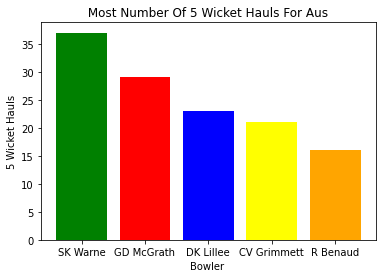

In [193]:
plt.bar(list(DF['Innings Player'].value_counts()[:5].keys()),  list(DF['Innings Player'].value_counts()[:5]),color=['green','red','blue','yellow','orange']        )



plt.title(' Most Number Of 5 Wicket Hauls For Aus ')
plt.xlabel('Bowler ')
plt.ylabel('5 Wicket Hauls')
plt.savefig('Most Number Of 5 Wicket Hauls For Aus.jpg')

plt.show()

In [195]:
req_df1 = df_bowling[(df_bowling.Country=='India')]

In [201]:
req_df1['5 Wickets'].value_counts()

0    4812
1    343 
Name: 5 Wickets, dtype: int64

In [203]:
DF1 = req_df1[req_df1['5 Wickets']!=0]

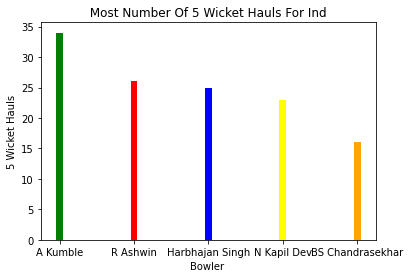

In [208]:
plt.bar(list(DF1['Innings Player'].value_counts()[:5].keys()),  list(DF1['Innings Player'].value_counts()[:5]),color=['green','red','blue','yellow','orange'] ,       )



plt.title(' Most Number Of 5 Wicket Hauls For Ind ')
plt.xlabel('Bowler ')
plt.ylabel('5 Wicket Hauls')

plt.show()